# Modeling

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style('whitegrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

## Read CSV file

In [2]:
df1 = pd.read_csv('bridge_data_cleaned1')
df1.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [3]:
df2 = pd.read_csv('bridge_data_cleaned2')
df2.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Minnesota,L9347,8,8,0,N,3,114,83.0,9,...,0,0.0,32.2,24.0,25.9,5.0,5.0,7.0,40,28
1,Minnesota,L9903,N,N,N,N,3,112,83.0,9,...,0,0.0,11.5,0.0,0.0,NaN,NaN,NaN,28,0
2,Minnesota,96781,N,N,N,N,3,96,111.0,7,...,0,30.0,11.8,0.0,0.0,NaN,NaN,NaN,450,4
3,Minnesota,34J05,N,N,N,N,3,111,89.0,9,...,0,4.0,12.1,0.0,0.0,NaN,NaN,NaN,48,12
4,Minnesota,17508,8,6,0,N,3,112,83.0,9,...,0,0.0,44.9,20.3,21.7,8.0,7.0,7.0,20,8


In [4]:
df3 = pd.read_csv('bridge_data_cleaned3')
df3.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Pennsylvania,000000000018583,1,6,2,0,3,117,59.0,2,...,0,1.0,21.0,49.2,52.5,6.0,6.0,6.0,12394,10
1,Pennsylvania,000000000041175,1,1,0,1,3,117,70.0,1,...,0,35.0,240.2,52.2,55.1,8.0,7.0,7.0,12189,15
2,Pennsylvania,000000000041176,1,1,0,1,3,117,70.0,1,...,0,34.0,226.0,51.8,54.8,8.0,7.0,7.0,12744,14
3,Pennsylvania,000000000004028,1,3,0,1,3,104,48.0,1,...,2004,0.0,32.2,40.0,43.6,8.0,6.0,6.0,8169,34
4,Pennsylvania,000000000009312,N,N,N,N,3,117,70.0,1,...,0,56.0,37.1,0.0,0.0,NaN,NaN,NaN,11792,39


In [5]:
df = pd.concat([df1, df2, df3])
df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [6]:
df.shape

(592756, 38)

In [7]:
df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="construction_design_value", y="bridge_age", data=df,
            label="bridge_condition", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="abbrev", y="alcohol", data=df,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\milen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-a56484149c53>", line 18, in <module>
    sns.barplot(x="abbrev", y="alcohol", data=df,
  File "C:\Users\milen\anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\Users\milen\anaconda3\lib\site-packages\seaborn\categorical.py", line 3182, in barplot
    plotter = _BarPlotter(x, y, hue, data, order, hue_order,
  File "C:\Users\milen\anaconda3\lib\site-packages\seaborn\categorical.py", line 1584, in __init__
    self.establish_variables(x, y, hue, data, orient,
  File "C:\Users\milen\anaconda3\lib\site-packages\seaborn\categorical.py", line 153, in establish_variables
    raise ValueError(err)
ValueError: Could not interpret input 'abbrev'

During handling of the above exception, another exception occurred:

Traceba

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x000001CAD2CF4160> (for post_execute):


KeyboardInterrupt: 

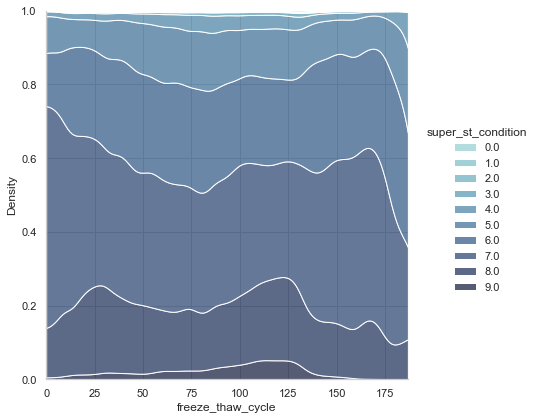

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
# diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="freeze_thaw_cycle", hue="super_st_condition",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

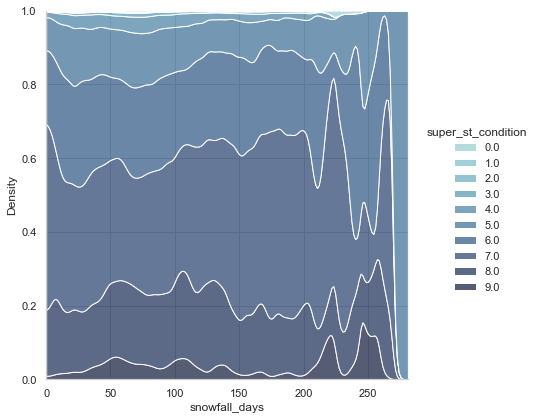

In [32]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
# diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="snowfall_days", hue="super_st_condition",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

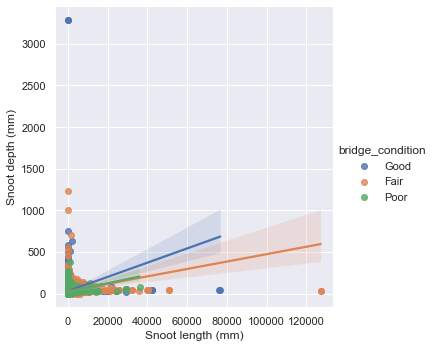

In [40]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="structure_length", y="bridge_width", hue="bridge_condition",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [52]:
df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

In [54]:
import seaborn as sns

sns.set_theme(style="darkgrid")
# df = sns.load_dataset("penguins")
sns.displot(
    df, x="avg_truck_trfc", col="bridge_age", row="bridge_condition",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020D0BC19280> (for post_execute):


KeyboardInterrupt: 

## Creating Dummies

In [295]:
df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'design_material', 'num_spans', 'structure_length', 'bridge_condition',
       'bridge_age', 'latitude', 'longitude', 'mnt_respons', 'yr_reconst',
       'skew', 'max_span', 'bridge_width', 'deck_width', 'super_st_condition',
       'sub_st_condition', 'deck_condition', 'avg_daily_trfic'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592756 entries, 0 to 192755
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   state                        592756 non-null  object 
 1   str_id                       592756 non-null  object 
 2   deck_type                    592756 non-null  object 
 3   wearing_type                 592756 non-null  object 
 4   membrane_type                592756 non-null  object 
 5   deck_protection              592756 non-null  object 
 6   toll                         592755 non-null  float64
 7   freeze_thaw_cycle            592756 non-null  int64  
 8   snowfall_days                592756 non-null  float64
 9   inventory_class_route        592755 non-null  float64
 10  lanes_on_str                 592756 non-null  int64  
 11  lanes_under_str              592756 non-null  int64  
 12  level_service_code           592756 non-null  int64  
 13 

In [10]:
# df['sub_st_condition'] = df.sub_st_condition.astype('str')
# df['super_st_condition'] = df.super_st_condition.astype('str')
# df['deck_condition'] = df.deck_condition.astype('str')
# df['mnt_respons'] = df.mnt_respons.astype('str')
df['toll'] = df.toll.astype('str')

In [11]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material','super_st_condition',
               'sub_st_condition']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans']

to_drop = ['state', 'str_id', 'deck_condition', 'mnt_respons']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449247 entries, 0 to 449246
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               449247 non-null  object 
 1   str_id              449247 non-null  object 
 2   deck_type           449247 non-null  object 
 3   wearing_type        449247 non-null  object 
 4   membrane_type       449247 non-null  object 
 5   deck_protection     449247 non-null  object 
 6   toll                449247 non-null  object 
 7   freeze_thaw_cycle   449247 non-null  int64  
 8   snowfall_days       449247 non-null  float64
 9   design_material     449247 non-null  object 
 10  num_spans           449247 non-null  int64  
 11  structure_length    449247 non-null  float64
 12  bridge_condition    449247 non-null  object 
 13  bridge_age          449247 non-null  int64  
 14  latitude            449247 non-null  float64
 15  longitude           449247 non-nul

In [8]:
# print number of classes in each category
for col in categorical:
    print(col, df[col].value_counts().count())

deck_type 10
wearing_type 11
membrane_type 7
deck_protection 10
toll 5
design_material 9
super_st_condition 10
sub_st_condition 10


In [9]:
df.drop(to_drop+target+continuous, axis=1).columns

Index(['deck_type', 'wearing_type', 'membrane_type', 'deck_protection', 'toll',
       'design_material', 'super_st_condition', 'sub_st_condition'],
      dtype='object')

In [10]:
df_dummies = pd.get_dummies(df.drop(to_drop+target, axis=1))
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,num_spans,structure_length,bridge_age,latitude,longitude,yr_reconst,skew,max_span,...,sub_st_condition_0,sub_st_condition_1,sub_st_condition_2,sub_st_condition_3,sub_st_condition_4,sub_st_condition_5,sub_st_condition_6,sub_st_condition_7,sub_st_condition_8,sub_st_condition_9
0,14,0.0,3,955.1,15,31.12305,-85.05527,0.0,23.0,274.9,...,0,0,0,0,0,0,0,1,0,0
1,14,0.0,3,399.0,63,31.18900,-85.11860,0.0,0.0,60.0,...,0,0,0,0,0,0,0,1,0,0
2,14,0.0,3,44.9,31,31.10713,-85.17017,0.0,0.0,15.1,...,0,0,0,0,0,0,1,0,0,0
3,14,0.0,4,136.2,50,31.05421,-85.20689,0.0,0.0,34.1,...,0,0,0,0,0,0,0,1,0,0
4,14,0.0,11,451.1,36,31.01672,-85.22263,0.0,0.0,41.0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_dummies.shape

(449247, 85)

In [12]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449247 entries, 0 to 449246
Data columns (total 85 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   freeze_thaw_cycle                                                            449247 non-null  int64  
 1   snowfall_days                                                                449247 non-null  float64
 2   num_spans                                                                    449247 non-null  int64  
 3   structure_length                                                             449247 non-null  float64
 4   bridge_age                                                                   449247 non-null  int64  
 5   latitude                                                                     449247 non-null  float64
 6   longitude                   

In [13]:
df.num_spans.value_counts().count()

162

In [14]:
df_dummies['bridge_condition'] = df['bridge_condition']

In [15]:
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,num_spans,structure_length,bridge_age,latitude,longitude,yr_reconst,skew,max_span,...,sub_st_condition_1,sub_st_condition_2,sub_st_condition_3,sub_st_condition_4,sub_st_condition_5,sub_st_condition_6,sub_st_condition_7,sub_st_condition_8,sub_st_condition_9,bridge_condition
0,14,0.0,3,955.1,15,31.12305,-85.05527,0.0,23.0,274.9,...,0,0,0,0,0,0,1,0,0,Good
1,14,0.0,3,399.0,63,31.18900,-85.11860,0.0,0.0,60.0,...,0,0,0,0,0,0,1,0,0,Fair
2,14,0.0,3,44.9,31,31.10713,-85.17017,0.0,0.0,15.1,...,0,0,0,0,0,1,0,0,0,Fair
3,14,0.0,4,136.2,50,31.05421,-85.20689,0.0,0.0,34.1,...,0,0,0,0,0,0,1,0,0,Good
4,14,0.0,11,451.1,36,31.01672,-85.22263,0.0,0.0,41.0,...,0,0,0,0,0,0,1,0,0,Good


In [16]:
df_dummies.bridge_condition.value_counts(normalize=True)

Fair    0.496446
Good    0.416535
Poor    0.087019
Name: bridge_condition, dtype: float64

In [17]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [18]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# KNN

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

In [20]:
X_train

,freeze_thaw_cycle,snowfall_days,num_spans,structure_length,bridge_age,latitude,longitude,yr_reconst,skew,max_span,...,sub_st_condition_0,sub_st_condition_1,sub_st_condition_2,sub_st_condition_3,sub_st_condition_4,sub_st_condition_5,sub_st_condition_6,sub_st_condition_7,sub_st_condition_8,sub_st_condition_9
167137,32,8.0,3,162.1,61,34.35063,-89.91383,0.0,0.0,66.9,...,0,0,0,0,0,0,0,1,0,0
184364,96,40.0,1,44.0,111,39.15683,-93.35815,1979.0,0.0,43.0,...,0,0,0,0,0,0,0,1,0,0
405315,120,85.0,2,211.9,37,43.00471,-89.70281,0.0,5.0,105.0,...,0,0,0,0,0,1,0,0,0,0
175233,92,32.0,1,51.8,71,37.32571,-94.13771,0.0,0.0,48.9,...,0,0,0,0,0,0,1,0,0,0
220344,112,101.0,1,41.0,18,41.77110,-75.02743,0.0,23.0,38.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,122,77.0,1,32.2,71,41.62357,-80.54185,0.0,30.0,32.2,...,0,0,0,0,0,0,0,0,1,0
365838,25,9.0,1,185.0,31,31.43111,-100.50660,0.0,24.0,105.0,...,0,0,0,0,0,0,0,1,0,0
131932,86,15.0,1,42.0,52,39.36397,-77.74014,1985.0,0.0,40.4,...,0,0,0,0,0,0,1,0,0,0
146867,62,66.0,1,67.9,57,43.03139,-86.16049,0.0,50.0,65.0,...,0,0,0,0,0,0,0,1,0,0


## Baseline model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [22]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.73      0.82      0.77    156417
        Good       0.78      0.76      0.77    130758
        Poor       0.72      0.28      0.41     27297

    accuracy                           0.75    314472
   macro avg       0.74      0.62      0.65    314472
weighted avg       0.75      0.75      0.74    314472



In [23]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.63      0.72      0.67     66610
        Good       0.67      0.65      0.66     56369
        Poor       0.46      0.17      0.25     11796

    accuracy                           0.64    134775
   macro avg       0.59      0.51      0.53    134775
weighted avg       0.63      0.64      0.63    134775



## Confusion Matrix

<Figure size 432x360 with 0 Axes>

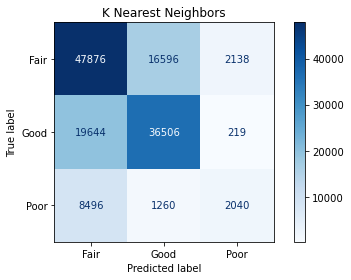

In [24]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardizing 

In [25]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,freeze_thaw_cycle,snowfall_days,num_spans,structure_length,bridge_age,latitude,longitude,yr_reconst,skew,max_span,...,sub_st_condition_0,sub_st_condition_1,sub_st_condition_2,sub_st_condition_3,sub_st_condition_4,sub_st_condition_5,sub_st_condition_6,sub_st_condition_7,sub_st_condition_8,sub_st_condition_9
0,-0.994717,-0.870071,0.059329,-0.021431,0.597331,-0.819948,0.146625,-0.432115,-0.639806,0.144011,...,-0.042047,-0.022981,-0.050565,-0.094988,-0.196159,-0.390549,-0.566765,1.250642,-0.434138,-0.160485
1,0.470534,0.004521,-0.346579,-0.243029,2.519327,0.175207,-0.117393,2.295840,-0.639806,-0.327717,...,-0.042047,-0.022981,-0.050565,-0.094988,-0.196159,-0.390549,-0.566765,1.250642,-0.434138,-0.160485
2,1.020003,1.234415,-0.143625,0.072012,-0.325227,0.971936,0.162800,-0.432115,-0.365186,0.896014,...,-0.042047,-0.022981,-0.050565,-0.094988,-0.196159,2.560499,-0.566765,-0.799590,-0.434138,-0.160485
3,0.378956,-0.214127,-0.346579,-0.228394,0.981730,-0.203938,-0.177149,-0.432115,-0.639806,-0.211265,...,-0.042047,-0.022981,-0.050565,-0.094988,-0.196159,-0.390549,1.764401,-0.799590,-0.434138,-0.160485
4,0.836847,1.671711,-0.346579,-0.248659,-1.055586,0.716509,1.287715,-0.432115,0.623448,-0.424431,...,-0.042047,-0.022981,-0.050565,-0.094988,-0.196159,-0.390549,-0.566765,1.250642,-0.434138,-0.160485


In [26]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

## GridSearch CV

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [30, 40], 'n_neighbors': [1, 5, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [29]:
grid_search.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [30]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

<Figure size 432x360 with 0 Axes>

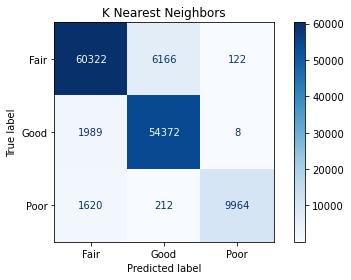

In [31]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Smote

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Fair    223027
Good    187127
Poor     39093
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Good    156417
Poor    156417
Fair    156417
Name: bridge_condition, dtype: int64


In [34]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [35]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    156417
        Good       1.00      1.00      1.00    156417
        Poor       1.00      1.00      1.00    156417

    accuracy                           1.00    469251
   macro avg       1.00      1.00      1.00    469251
weighted avg       1.00      1.00      1.00    469251



In [36]:
print(classification_report(y_test, knn_smote.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.51      0.59     66610
        Good       0.71      0.73      0.72     56369
        Poor       0.25      0.59      0.35     11796

    accuracy                           0.61    134775
   macro avg       0.55      0.61      0.55    134775
weighted avg       0.66      0.61      0.62    134775



## Confusion matrix

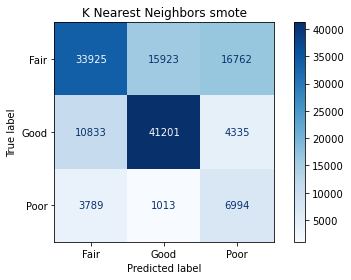

In [37]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

array([[60757,  5812,    41],
       [  927, 55439,     3],
       [ 1429,   167, 10200]], dtype=int64)

In [40]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    156417
        Good       1.00      1.00      1.00    130758
        Poor       1.00      1.00      1.00     27297

    accuracy                           1.00    314472
   macro avg       1.00      1.00      1.00    314472
weighted avg       1.00      1.00      1.00    314472



In [41]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.96      0.91      0.94     66610
        Good       0.90      0.98      0.94     56369
        Poor       1.00      0.86      0.93     11796

    accuracy                           0.94    134775
   macro avg       0.95      0.92      0.93    134775
weighted avg       0.94      0.94      0.94    134775



## Confusion matrix

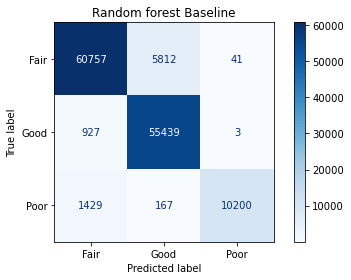

In [42]:
plot_confusion_matrix(forest, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Standardizing

In [43]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier()
# Fit the classifier
forest.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, forest)
metrics['name'] = 'Random forest scaled'
models.append(metrics)

## GridSearch CV

In [44]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
grid_search.best_params_

{'max_depth': 35, 'max_features': 50, 'n_estimators': 200}

In [46]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned1'
models.append(metrics)

In [48]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

              precision    recall  f1-score   support

        Fair       0.97      0.90      0.93     66610
        Good       0.89      0.99      0.94     56369
        Poor       1.00      0.85      0.92     11796

    accuracy                           0.93    134775
   macro avg       0.95      0.91      0.93    134775
weighted avg       0.94      0.93      0.93    134775



In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Rand2om Forest tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random Forest tuned1')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_smote.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

## Feature Importance

In [ ]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb.predict(X_train))

In [ ]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

### Standardized

In [ ]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

### Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Instantiate XGBClassifier and fit classifier

# xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
#                           subsample=0.7)

xgb_tuned = XGBClassifier(objective = objective='multi:softmax', num_class = 3,
                          n_estimators = 200, learning_rate = .1, max_depth = 10, subsample =0.7)


xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)



In [ ]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test)))

# Replace target variable classes for visualization

In [4]:
# Replace target values - there are three classes
df2 = df.replace({'bridge_condition': {'Poor' : 2, 
                                'Fair' : 1, 
                                'Good' : 0}})
# Check to see that it worked
df2.iloc[15:20]

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
15,Alabama,013329,N,N,N,N,3.0,14.0,0.0,6.0,...,0.0,30.0,13.8,0.0,0.0,NaN,NaN,NaN,1820.0,9.0
16,Alabama,009759,N,6,0,0,3.0,14.0,0.0,8.0,...,0.0,0.0,12.1,0.0,0.0,NaN,NaN,NaN,295.0,15.0
17,Alabama,017064,2,0,0,0,3.0,14.0,0.0,7.0,...,0.0,0.0,34.1,28.5,30.8,7.0,6.0,7.0,775.0,30.0
18,Alabama,019836,2,0,0,0,3.0,14.0,0.0,8.0,...,0.0,0.0,34.1,27.9,27.9,8.0,8.0,8.0,95.0,0.0
19,Alabama,006867,N,6,0,0,3.0,14.0,0.0,8.0,...,0.0,0.0,14.1,0.0,0.0,NaN,NaN,NaN,250.0,7.0


In [5]:
df2.shape

(592756, 38)

# Folium Heatmap

In [12]:
import folium
from folium.plugins import HeatMap

In [13]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m

## By state

In [14]:
data = df2.groupby('state').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data

KeyError: "['bridge_condition'] not in index"

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}
HeatMap(data = data).add_to(m)

In [ ]:
display(m)

## By Sub-structure condition

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data1 = df2.groupby('sub_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [15]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data1).add_to(m)
display(m)

NameError: name 'data1' is not defined

## By snowfall days

In [16]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [15]:

data2 = df2.groupby('snowfall_days').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data2

[[30.81525, -90.9198, 0.0],
 [32.71175, -95.51144, 0.0],
 [33.01422, -93.85991, 1.0],
 [34.09958, -84.40154, 0.0],
 [33.806045, -92.33647500000001, 1.0],
 [33.21925, -96.67408, 1.0],
 [34.739055, -83.205245, 1.0],
 [34.157685, -92.15238, 1.0],
 [34.496230000000004, -89.98381499999999, 1.0],
 [35.2489, -89.05008500000001, 1.0],
 [35.74039, -82.17408499999999, 1.0],
 [34.69527, -95.30958, 1.0],
 [36.5909, -79.4095, 1.0],
 [35.850105, -86.98658499999999, 1.0],
 [35.659585, -86.54159, 1.0],
 [36.52417, -87.59483, 1.0],
 [36.66052, -86.85858, 1.0],
 [35.43073, -95.95705, 1.0],
 [37.589625, -86.79764, 1.0],
 [36.08979, -95.61946499999999, 1.0],
 [36.76089, -95.94744499999999, 1.0],
 [36.000455, -93.4646, 1.0],
 [38.08543, -87.58839, 1.0],
 [37.33333, -99.14954, 1.0],
 [36.21252, -89.68290999999998, 1.0],
 [38.02805, -86.3869, 1.0],
 [36.62914000000001, -85.333745, 1.0],
 [36.7107, -97.3004, 1.0],
 [37.04388, -89.28664, 1.0],
 [37.38908, -84.01389, 1.0],
 [37.976115, -87.035955, 1.0],
 [38.25

In [16]:
# gradient = {0: 'red', 1.0: 'brown', 2.0: 'green'}

HeatMap(data = data2).add_to(m)
display(m)

## By age of bridge

In [17]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [18]:

data3 = df2.groupby('bridge_age').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [19]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data3).add_to(m)
display(m)

## By Freeze and thaw cycle

In [20]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [21]:

data4 = df2.groupby('freeze_thaw_cycle').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [22]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data4).add_to(m)
display(m)

## By Super structure condition

In [23]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [24]:

data5 = df2.groupby('super_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data5

[[39.3292, -93.41373, 2.0],
 [40.265985, -83.49901000000001, 2.0],
 [38.65, -90.6217, 2.0],
 [40.33672, -88.518445, 2.0],
 [39.85921, -86.92074000000002, 2.0],
 [39.553, -88.17093, 1.0],
 [39.08619, -90.03333, 1.0],
 [38.342095, -91.17092, 0.0],
 [39.24333, -89.45774, 0.0],
 [40.463335, -84.202155, 0.0]]

In [25]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data5).add_to(m)
display(m)